[Barnsley_fern - (en.wikipedia.org)](https://en.wikipedia.org/wiki/Barnsley_fern)


In [4]:
import numpy as np
import matplotlib.pyplot as plt


def ifs(p, eq, init, n):
    """
    input:
        p: every function's probability
        eq: iteration function list
        init: iteration initial point
        n: interation times
    output:
        every iteration's x coordinate array, Y coordinate array, function index
    """

    # initialize of iteration vector
    pos = np.ones(3, dtype=float)
    pos[:2] = init

    # calculate the function select sequence by probability
    p = np.add.accumulate(p)
    rands = np.random.rand(n)
    select = np.ones(n, dtype=int)*(n-1)

    for i, x in enumerate(p[::-1]):
        select[rands < x] = len(p)-i-1

    # initialize of result
    result = np.zeros((n, 2), dtype=float)
    c = np.zeros(n, dtype=float)

    for i in range(n):
        eqidx = select[i]               # 所选的函数下标
        tmp = np.dot(eq[eqidx], pos)    # 进行迭代
        pos[:2] = tmp                   # 更新迭代向量

        # save result
        result[i] = tmp
        c[i] = eqidx

    return result[:, 0], result[:, 1], c


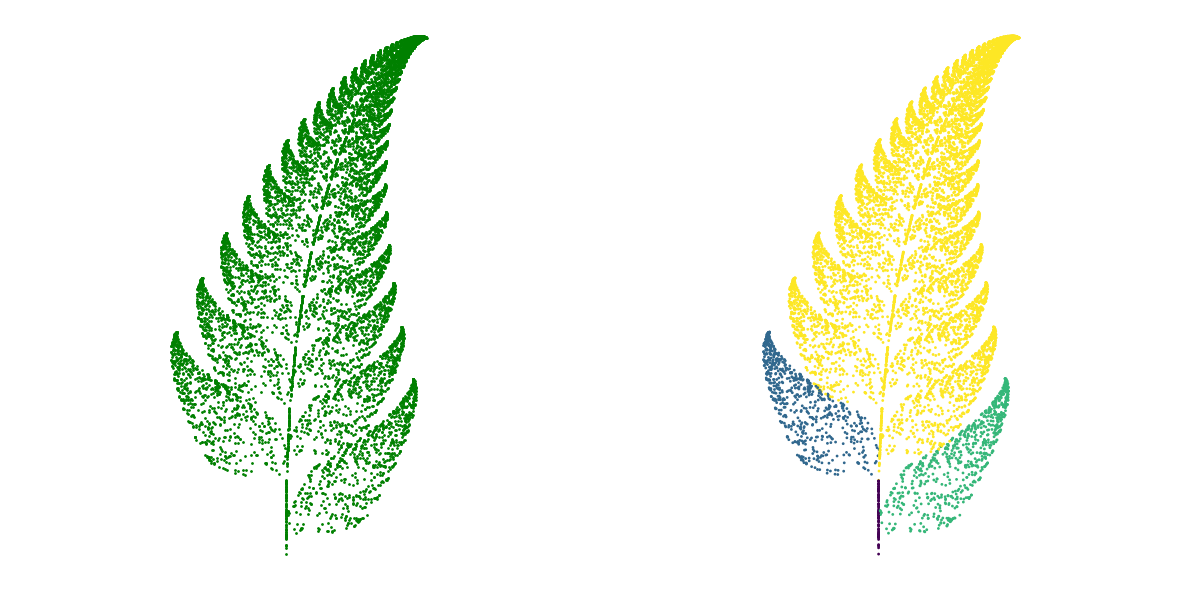

In [5]:
# Iteration function and probability value of fern leaf
eq1 = np.array([[0, 0, 0], [0, 0.16, 0]])
p1 = 0.01

eq2 = np.array([[0.2, -0.26, 0], [0.23, 0.22, 1.6]])
p2 = 0.07

eq3 = np.array([[-0.15, 0.28, 0], [0.26, 0.24, 0.44]])
p3 = 0.07

eq4 = np.array([[0.85, 0.04, 0], [-0.04, 0.85, 1.6]])
p4 = 0.85

# iteration
x, y, c = ifs([p1, p2, p3, p4], [eq1, eq2, eq3, eq4], [0, 0], 10000)

# plot
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 6))
ax1.axis("equal")
ax1.axis("off")
ax1.scatter(x, y, s=1, c='g')

ax2.axis("equal")
ax2.axis("off")
ax2.scatter(x, y, s=1, c=c)

plt.tight_layout()
plt.show()
